In [133]:
import requests
import os
import pandas as pd
import networkx as nx

tickers = [44598,118,66572,17799,17800,177156,73,74,27760,27759,27806,33197,30447,39682,35646,39683,28430,28431,124,123,9477,16371,27808,28887,28886,28885,30459,28888,28889,27909,131,304037,29628,17764,45230,133,134,16488,135,136,137,138,140,139,141,142,143,144,316756,100,101,102,18021,48903,41369,41479,27802,27803,15996,9248,29059,29060,157,28370,265683,82037,36362,168,326522,158,159,169,41480,41481,170,172,171,107,108,131341,109,13999,110,9761,173,174,175,178,177,111,113,112,35281,17338,15995,182,183,27755,98316,59129,231701,14963,199,200,27906,27907,140527,90039,204,45229,28600,28601,211,212,213,214,215,216,41228,41229,49714,49718,49715,49719,49720,49716,49721,49717,49722,217,40761,227,228,232,132079,27812,27811,80302,16112,51884,9086,370855,293599,293598,370853,293597,370856,285949,293600,370858,370852,293596,370851,370857,107340,51851,27765,27810,164132,187,27788,27787,236,237,28396,28397,239,240,41482,41483,188,189,190,17293,191,112867,41807,27813,27814,241,193,194,195,196,31135,41981,41982,27927,27928,244,51864,246,273,276,277,348820,348819,348822,348821,28376,281,27756,27757,252,27881,287,288,293,294,291,28543,28544,292,289,290,27768,27779,28372,28373,28584,28585,28586,28587,28588,28589,304,305,28590,28591,307,306,27753,27754,56478,28368,28369,310,311,308,309,316,317,27828,321,322,27965,27966,27967,27968,27969,27970,83941,258,257,28564,16128,32863,32340,161233,299415,299416,299417,327936,299413,299414,259951,259952,259953,259954,279096,279097,67765,32339,32342,32341,264,28576,28577,28578,28579,28580,28581,265,266,267,109824,419911,269,48800,48801,29037,51883,270,28411,28412,42052,42053,27740,431091,431092,42056,40089,27798,42605,61131,346,330,283676,298554,40087,42057,42663,42662,38822,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,109823,46551,89096,375810,316757,51850,27830,27831,27832,27833,336,15428,51856,231706,231707,34618,28423,138493,342,27834,27835,395,396,397,399,400,27915,27916,27917,27918,27919,27920,27921,27922,27923,27924,27925,27926,403,404,27766,27776,27795,27796,31351,383,51849,57307,247806,121191,29046,44517,388,9120,38756,17798,370303,157749,150226,250906,250907,415,416,391,392,393,394,96032,116056,133825,90176,15168,82036,424,66357,438,9249,182601,448,57591,265684,42055,79206,82986,41824,27885,27886,41825,36443,443,444,29038,125218,239032,263842,175669,55259,284845,17765,17766,278350,79287,445,239658,256172,15166,50968,446,157781,51921,43788,53333,376761,46805,51913,249348,44733,51942,53203,231699,343357,370304,260077,404395,51943,47065,28392,28393,464,465,27839,27840,466,467,41489,41490,65852,27744,27783,41488,41486,41487,470,65447,471,9976,389865,388229,79256,473,475,474,477,143108,478,479,51885,17810,488,489,490,37332,491,492,49273,49274,50956,50957,17107,16370,494,495,496,497,499,15662,231703,310336,231705,370854,264501,51887,460,27746,27751,506,461,69080,83024,95819,73034,87946,85762,54955,109748,87981,67182,55017,64989,149735,61245,70948,69783,70947,149736,64409,65854,69860,64990,74299,73033,74300,69435,85366,65665,69861,68543,69884,462,545,27841,27913,28343,548,550,28371,555,511,27964,27963,34936,558,559,560,561,28426,29055,29058,519,27816,27817,571,572,573,574,520,42049,521,525,528,529,49900,581,580,41491,27735,27872,27873,27807,27842,582,41810,534,28350,535,586,587,589,41809,28394,28395,591,592,69859,540,28436,28437,602,598,27730,599,605,606,607,608,541,542,611,612,614,38032,49583,615,28927,28676,47480,616,41969,41967,41968,48811,49088,41492,41493,27818,27819,28363,28364,620,619,621,622,127802,543,544,643,200335,14995,647,311936,64410,27741,27775,650,648,653,652,41230,40946,28360,660,659,161887,41496,41497,629,632,633,634,27843,27844,27910,27887,635,636,637,41498,666,31760,31761,832,17326,42385,833,838,28398,28399,840,841,41813,669,27845,27846,672,673,15557,854,49747,855,856,61457,84352,16349,9820,862,9060,35831,51876,17105,27888,27889,28335,79862,82984,27849,716,28563,192631,35101,879,28410,28413,881,880,41970,51353,893,46788,33490,27847,889,27971,27848,27734,891,892,9441,726,728,27905,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,49089,747,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,778,777,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,41499,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,36230,28325,28326,826,138531,41971,41972,35613,51860,108446,375564,905,182596,906,319658,39588,28414,28415,944,945,41973,940,27853,40846,909,910,40845,89382,913,915,916,917,948,28351,28407,28408,951,952,949,950,29702,27749,41974,27784,41975,957,35798,27851,27852,27738,27850,27747,962,963,927,928,29036,964,15813,27854,81204,81209,28545,965,47661,28508,28509,28510,28511,28512,967,968,969,28513,970,28514,28515,28516,28517,971,973,28449,974,28454,28455,28450,28451,28452,28453,975,28481,978,979,28327,54550,53204,67050,85461,984,42015,17763,17762,985,40762,43149,27771,27770,989,990,992,18048,1000,1001,993,241006,280122,284441,214103,17145,136964,285700,27729,41401,41402,28418,28419,1004,1005,27820,27772,45274,300848,1006,1007,27804,27805,76910,42084,67217,1013,41500,35502,35501,1014,91758,82953,192671,471406,392640,276243,318087,40833,28400,28401,1263,1264,1265,1266,41503,41504,57251,43712,208921,42051,1271,1273,1272,27762,27739,352917,51220,51221,47454,1275,41501,41814,41815,41816,41817,41818,41819,1019,46251,60069,1021,1022,1023,1024,1026,1027,1025,1028,1029,1030,1031,51886,1033,15018,67893,58629,1034,37247,80230,116057,1035,1036,70591,39670,89180,51923,120543,51881,120457,87940,1037,1038,51894,1039,1044,1041,1040,1042,1043,51915,37255,51324,370299,1045,51935,31603,229328,1046,14000,249180,293857,1047,1048,51896,51905,31064,1049,1050,1053,9265,1051,1052,31063,31062,1054,1055,51862,1056,38034,1057,40940,49569,51857,51940,64418,46522,36267,1058,1072,31082,158040,119793,52515,1059,1060,158039,1061,1062,1063,1064,1065,1066,1067,1068,51934,69991,1069,1070,1071,231698,51861,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,47417,37775,51930,51950,53332,1084,51951,51325,51326,51323,51906,51865,51924,51899,51874,51873,1085,51963,51897,51922,51868,30470,43360,40214,51909,52598,1086,51879,51290,231702,1087,43735,1088,1089,51960,31616,28603,48769,1091,49749,48766,60067,36849,51322,1090,51908,63511,68552,33759,51937,33758,61829,1092,51932,38821,1093,1094,41249,18029,370300,35832,1095,51945,1096,1097,31443,37256,1098,1099,49189,51911,370302,1101,10132,231694,51880,1102,49259,51617,51918,15047,28890,39684,1103,51867,51895,1104,1105,51822,34535,1106,32450,38033,30371,1107,1100,66464,46521,43709,1108,152694,33556,1109,51891,51866,51869,31084,51858,1110,31083,127713,51948,47416,1111,1112,1119,41404,1120,1121,9153,31065,1122,1123,1124,1125,1126,10133,1127,51888,1134,51321,51954,1128,1129,1130,1132,1131,51904,1133,44735,33195,1113,45571,51291,62499,28962,42988,1135,1114,1115,51898,1116,1136,16432,1137,60068,31617,51907,1117,1118,36517,51920,1139,231696,142918,1140,1141,1142,1143,1144,44504,44505,1145,68196,1138,51852,1146,231695,51910,1147,1148,1149,1150,30472,1154,1153,1151,1152,1155,1156,35928,51938,33418,1160,32155,28926,51941,51926,43711,43713,51958,1161,1162,60491,51957,43014,1164,30469,30471,1163,1165,51917,1166,1167,28604,51959,1168,51956,35285,1169,51955,51889,46543,51946,50789,1170,16606,1157,1158,1159,52027,31136,46012,51227,1171,67207,64417,1172,1184,1185,51949,1186,1187,53461,48767,1183,61827,47429,195903,51927,1173,1174,1175,1176,1177,1188,51893,1178,1179,51962,51928,1189,27974,17285,51966,1190,51892,1191,1182,1180,1181,1192,370301,52414,67115,52413,52424,52419,52418,53132,52409,52416,52411,52422,52421,52420,52415,52423,52417,30372,51964,1193,52599,38741,51936,51890,1194,1195,51944,31602,1196,69992,51863,9763,1197,31615,64451,1198,79288,264502,282370,31022,65853,36848,49923,1201,1202,1203,1204,1207,1208,1205,1209,1210,1206,1211,37254,1212,1213,1214,46737,41251,51953,1215,28602,51878,30299,316069,361985,1199,1200,31714,36847,49190,49191,1216,1217,1218,1219,1220,51961,51929,1222,1224,1223,1225,1221,47648,1226,51853,1227,61828,51919,27904,44503,51916,1228,42661,1229,41381,41370,48768,1230,51859,36266,1233,51939,1232,63510,31445,1231,51925,1235,17996,1238,1234,51854,1237,1236,9033,9390,17949,84353,39228,43806,1240,1241,41502,1279,103315,1281,1243,231700,351691,35956,1284,1285,1286,1287,1288,1289,27778,28409,17327,1294,58189,43367,48946,1297,28606,43807,1246,1247,1248,1300,27731,27752,30375,1250,1251,51931,1252,1254,1255,1256,1257,1352,1353,1303,27911,27912,1304,1359,35301,28353,1308,1307,27895,27890,46667,33408,245559,62535,30373,1310,46596,28416,28417,61060,103666,327296,59991,1311,1312,28607,202923,82985,304504,299434,1360,1361,1362,1363,1364,1365,1366,1367,1368,302658,82995,240455,246460,248542,251894,252040,253778,265097,51871,51872,51967,69883,28331,28332,28333,28334,1326,1327,58324,58325,120395,68379,1370,33481,17794,182597,182598,1372,28427,31085,1334,1373,240446,54102,54103,225741,297318,223552,1383,1384,36376,36377,36378,36379,36380,36381,36382,36383,36384,36385,36386,36387,36388,36389,36390,36391,27733,27748,27855,27856,49258,1385,1386,1380,1381,1337,1338,243319,241079,241080,240532,299418,297319,264549,243318,448424,448422,481282,481283,448423,475072,58323,1341,80286,246271,33198,16407,31679,36571,48895,63600,1389,30298,57601,58322,1402,1393,41334,41929,28561,114482,17328,137781,212947,316758,28404,1413,1412,82019,28303,27857,27858,27777,27767,27859,27860,40765,40766,27972,27973,27743,27799,248949,27800,27801,41494,41495,28329,41339,41340,28330,27791,27792,27789,27790,133839,107269,27764,27780,120783,471968,136983,231704,293335,107244,1463,28546,1464,182599,54930,68942,91014,317219,27862,27861,1467,27745,1465,1466,258193,17106,1469,259616,1479,1476,275963,9808,39756,40947,46738,45199,28424,28425,1418,27865,27864,27866,27867,27868,27869,1419,1420,84206,9251,16114,1492,1493,1494,27896,27863,1487,1488,32947,1495,1496,1498,17797,1497,1502,1503,82916,1506,30018,40779,51933,1434,28405,28406,28386,28387,1509,1510,1511,1512,119195,246840,355756,356296,28344,1515,42082,293245,175242,1516,42081,1437,310778,28428,28429,1526,1527,1528,1529,1445,9252,1530,27908,1536,9391,9087,1448,1542,1543,17240,354837,349614,349613,31023,73224,1600,1545,28361,28362,1606,1607,1604,1605,1547,41820,41821,1608,1609,30463,1610,1612,1613,1614,1615,28388,28389,1624,1625,1622,1623,1549,1554,28547,28548,1557,1558,1559,28518,28519,28520,28521,28522,28523,28524,1551,1552,1553,1560,1561,1562,1563,1564,1565,28549,28550,28551,1566,28525,28526,28527,1567,1568,28592,28477,28593,28478,28468,28479,28469,28480,28470,28594,28471,28472,28473,28474,28475,28476,1570,1571,1572,1573,1575,28483,28501,28484,28502,28485,28503,28486,28504,28487,28505,28488,28506,28489,28507,28490,28491,28492,28493,28494,28495,28496,28497,28498,28499,28500,1576,28439,28440,28441,28442,28443,28444,28445,28582,1577,1578,1579,28438,28552,28553,28554,28555,28556,28557,28558,28559,28560,1580,1582,28456,28457,28458,28459,28460,28461,28462,28463,28583,1584,1585,1586,1587,28464,28465,28466,28467,28572,28573,1626,40778,231693,1588,231692,41505,41811,41812,32421,41279,1593,59801,30648,32451,32452,136981,192485,83452,83453,83777,83804,83805,82934,83798,83799,83797,83795,27736,27737,1638,1639,27891,27892,27761,1640,1641,1598,1599,83843,41822,35278,31759,1658,160782,65189,85733,66489,1645,1646,1647,29054,51120,44507,35282,40684,41252,17118,85764,85765,1648,14964,14965,9937,63579,14966,43015,33196,42054,37269,37270,1660,27824,27825,1659,345243,113419,315848,61741,65892,28366,28367,27781,27782,1665,1681,27769,27875,27876,28390,28391,1683,1684,1688,1689,33749,34898,27826,27827,41930,208920,1691,1692,27713,1693,1694,33760,1670,1690,51912,27878,1701,1702,41980,17760,17761,27879,27880,27758,37444,37445,1706,45200,284439,284440,284442,16589,284437,284438,16588,16590,1678,27809,27897,28337,1664,41976,41977,41978,41979,27877,1718,27829,41403,51965,51855,16369,1710,16113,1711,367384,51952,367385,367387,51870,316754,316753,316755,51882,367386,42083,367389,367388,367390,43023,13955,56692,37859,1712,30448,31618,28324,27836,28352,27837,27838,41965,41966,80134,89181,1733,1734,35055,1745,1748,1738,1739,27943,27944,27945,27946,27947,27948,27949,27950,27951,27952,27953,27954,27955,27956,27957,27958,27959,27960,27961,27962,27929,27930,27931,27932,27933,27934,27935,27936,27937,27938,27939,27940,27941,27942,1741,28402,28403,27870,27871,1759,1760,1757,1758,1763,1765,1764,41959,27763,27815,136170,1767,1768,1749,41484,41485,1750,1753,1754,1755,37883,423334,231697,41960,27773,27821,27785,27786,41808,27822,27823,28328,27794,214131,69042,1786,16408,16409,30082,41962,41963,41964,41961,41231,152928,296773,27732,27884,51877,1801,1802,51875,1803,1805,28323,27750,27914,107301,102192,27742,27774,27893,27894,1796,1797,1798,27874,44777,28562,1818,1820,1811,1812,1813,27882,27883,27793,27797,1828,1826,1827,28374,28375,34958,1830,1831,41823]

print(len(tickers))

2325


Скачиваем данные 2325 компаний

In [135]:
get_request_url = "https://mfd.ru/export/handler.ashx/tiker.txt?TickerGroup=16&Tickers={}&Alias=false&Period=7&timeframeValue=1&timeframeDatePart=day&StartDate=01.01.2022&EndDate=31.12.2022&SaveFormat=0&SaveMode=1&FileName=tiker.txt&FieldSeparator=%253b&DecimalSeparator=.&DateFormat=yyyyMMdd&TimeFormat=HHmmss&DateFormatCustom=&TimeFormatCustom=&AddHeader=true&RecordFormat=0&Fill=true"

In [136]:
for ticker in tickers:
    request = requests.get(get_request_url.format(ticker))
    newFile = open(f"data_parse/{ticker}.txt", "wb+")
    newFile.write(request._content)
    newFile.flush()
    newFile.seek(0)
    newFile.close()

In [185]:


# Путь к директории с файлами
dir_path = 'data_parse'

# Список файлов в директории
file_list = os.listdir(dir_path)

# Создание пустого DataFrame
df = pd.DataFrame()

# Цикл по всем файлам в директории
for file in file_list:
    # Проверка, что файл имеет расширение .csv
    if file.endswith('.txt'):
        # Чтение файла и добавление его содержимого в DataFrame
        file_path = os.path.join(dir_path, file)
        temp_df = pd.read_csv(file_path, delimiter=";")
        df = pd.concat([df, temp_df], ignore_index=True)

340 компаний из 2325 имеют данные котировок

Выбираем только 77 компаний путем группировки

In [186]:
len(df["<TICKER>"].unique())

340

In [140]:
df["<TICKER>"].unique()

array(['ВИМФондАкц', 'ВыбСудЗ ао', 'СамарЭн-ао', 'ПИФСбер-КН', 'КСБ ао',
       'РГС СК ао', 'ВИМФондКаз', 'ГАЗ-Тек ао', 'СберАрБизн',
       'РсетСиб ао', 'РенДох2', 'ГАЗКОН-ао', 'Химпром ап', 'БКС РосАкц',
       'ФосАгро ао', 'ЗВЕЗДА ао', 'ЗПИФДОМ.РФ', 'СПБ Биржа', 'СберДен ОП',
       'РБК ао', 'ТНСэнрг ао', 'ДЭК ао', 'ГазпРнД ао', 'ПИФ АТРИУМ',
       'ВТБФондАкц', 'ОРЕОЛСтрой', 'ЭнелРос ао', 'БКСИнновац',
       'БурЗолото', 'ВТБСУБ1-13', 'РынокДМет', 'РД 2', 'ЛСР ао',
       'ТНСэКубань', 'ГлобалИн', 'Мегион-ап', 'ПИФИнМосБр', 'ТМК ао',
       'СаратНПЗ', 'ПАОДжиТиЭл', 'СОЛЛЕРС', 'ТНСэМаЭл-п', 'ОПИФПрРес',
       'РСетиСЗ ао', 'АйсCтим ао', 'ГК РБК ао', 'ЕвроЭлтех', 'ТРК ао',
       'ЗарРентБиз', 'ЦМТ ао', 'Полюс', 'НЛМК ао', 'Магнит ао',
       'Юнипро ао', 'РСетиЦП ао', 'МЕРИДИАН', 'ОргСинт ао', 'Нефтекамск',
       'Татнфт 3ап', 'Куйбазот', 'ГИТ ао', 'Ростел -ап', 'КузнецкийБ',
       'Якутскэнрг', 'ТГК-1', 'Совкомфлот', 'Славн-ЯНОС', 'Куйбазот-п',
       'ИПИФРайфМО', 'Сахэн

In [187]:
df = df[:32000]

In [188]:
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,ВИМФондАкц,D,20220418,0,33.25,33.75,32.05,32.30,6200,0
1,ВИМФондАкц,D,20220419,0,32.30,32.30,30.60,31.85,53450,0
2,ВИМФондАкц,D,20220420,0,31.90,32.65,31.25,32.15,22790,0
3,ВИМФондАкц,D,20220421,0,31.90,32.10,31.00,31.00,39680,0
4,ВИМФондАкц,D,20220422,0,30.85,31.90,30.35,30.70,41950,0
...,...,...,...,...,...,...,...,...,...,...
31995,МГТС-5ао,D,20220412,0,1925.00,1925.00,1775.00,1825.00,47,0
31996,МГТС-5ао,D,20220413,0,1815.00,1825.00,1780.00,1805.00,28,0
31997,МГТС-5ао,D,20220414,0,1805.00,1805.00,1775.00,1800.00,16,0
31998,МГТС-5ао,D,20220415,0,1785.00,1805.00,1785.00,1785.00,14,0


Группируем данные чтобы у всех компаний была одинаковая длина строк

In [189]:
# группировка данных по названию компании
groups = df.groupby('<TICKER>')

max_rows = groups.size().max()

filtered_groups = groups.filter(lambda x: len(x) == max_rows)

print(filtered_groups)

         <TICKER> <PER>    <DATE> <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  \
258    ВыбСудЗ ао     D  20220103      0   4635.0   4635.0   4635.0   4635.0   
259    ВыбСудЗ ао     D  20220104      0   4690.0   4700.0   4640.0   4640.0   
260    ВыбСудЗ ао     D  20220105      0   4650.0   4745.0   4650.0   4745.0   
261    ВыбСудЗ ао     D  20220106      0   4635.0   4745.0   4500.0   4605.0   
262    ВыбСудЗ ао     D  20220107      0   4605.0   4605.0   4605.0   4605.0   
...           ...   ...       ...    ...      ...      ...      ...      ...   
31891   УрКузница     D  20221227      0  17920.0  17920.0  17480.0  17480.0   
31892   УрКузница     D  20221228      0  17420.0  17480.0  15640.0  15900.0   
31893   УрКузница     D  20221229      0  16960.0  17380.0  16360.0  17120.0   
31894   УрКузница     D  20221230      0  16760.0  17080.0  16060.0  16320.0   
31895   УрКузница     D  20221231      0  16320.0  16320.0  16320.0  16320.0   

      <VOL> <OPENINT>  
258      10    

In [190]:
filtered_groups

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
258,ВыбСудЗ ао,D,20220103,0,4635.0,4635.0,4635.0,4635.0,10,0
259,ВыбСудЗ ао,D,20220104,0,4690.0,4700.0,4640.0,4640.0,12,0
260,ВыбСудЗ ао,D,20220105,0,4650.0,4745.0,4650.0,4745.0,5,0
261,ВыбСудЗ ао,D,20220106,0,4635.0,4745.0,4500.0,4605.0,24,0
262,ВыбСудЗ ао,D,20220107,0,4605.0,4605.0,4605.0,4605.0,0,0
...,...,...,...,...,...,...,...,...,...,...
31891,УрКузница,D,20221227,0,17920.0,17920.0,17480.0,17480.0,3,0
31892,УрКузница,D,20221228,0,17420.0,17480.0,15640.0,15900.0,17,0
31893,УрКузница,D,20221229,0,16960.0,17380.0,16360.0,17120.0,24,0
31894,УрКузница,D,20221230,0,16760.0,17080.0,16060.0,16320.0,19,0


In [191]:
len(filtered_groups["<TICKER>"].unique())

77

In [105]:
from scipy.stats import pearsonr

In [192]:
len(filtered_groups['<TICKER>'].unique())

77

Подсчет для порога = 0.6 по 77 компаниям

In [193]:
import networkx as nx

G = nx.Graph()

# добавление вершин (акций)
tickers = filtered_groups['<TICKER>'].unique()
for ticker in tickers:
    G.add_node(ticker)

# добавление ребер (корреляций)
corr_threshold = 0.6
for i in range(len(tickers)):
    print(i)
    for j in range(i+1, len(tickers)):
        ticker1 = tickers[i]
        
        ticker2 = tickers[j]
        # print(ticker1, ticker2)
        x = filtered_groups[filtered_groups['<TICKER>']==ticker1]['<CLOSE>']
        y = filtered_groups[filtered_groups['<TICKER>']==ticker2]['<CLOSE>']
        corr, _ = pearsonr(x, y)
        # corr = df[df['<TICKER>']==ticker1]['<CLOSE>'].corr(df[df['<TICKER>']==ticker2]['<CLOSE>'])
        # print(corr)
        if corr > corr_threshold:
            G.add_edge(ticker1, ticker2, weight=corr)

cliques = list(nx.find_cliques(G))
max_cliques = [c for c in cliques if len(c)==max([len(c) for c in cliques])]

print('Рыночный граф акций российских компаний:')
print(G.edges(data=True))
print('Максимальные клики:')
for clique in max_cliques:
    print(clique)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
Рыночный граф акций российских компаний:
[('ВыбСудЗ ао', 'РГС СК ао', {'weight': 0.7168367919910829}), ('ВыбСудЗ ао', 'ДЭК ао', {'weight': 0.7827671423083595}), ('ВыбСудЗ ао', 'БурЗолото', {'weight': 0.6996222957299483}), ('ВыбСудЗ ао', 'Мегион-ап', {'weight': 0.6826265083669878}), ('ВыбСудЗ ао', 'ЕвроЭлтех', {'weight': 0.6442846510705255}), ('ВыбСудЗ ао', 'ТРК ао', {'weight': 0.7541120623768311}), ('ВыбСудЗ ао', 'Магнит ао', {'weight': 0.6025851256777794}), ('ВыбСудЗ ао', 'РСетиЦП ао', {'weight': 0.6695990580597451}), ('ВыбСудЗ ао', 'МЕРИДИАН', {'weight': 0.7920066886643664}), ('ВыбСудЗ ао', 'КузнецкийБ', {'weight': 0.664329203871354}), ('ВыбСудЗ ао', 'Сахэнер ао', {'weight': 0.7361902612315884}), ('ВыбСудЗ ао', 'АбрауДюрсо', {'weight': 0.6892006008260636}), ('ВыбСудЗ

In [195]:
len(G.nodes())

77

In [222]:
max_cliques

[['Сахэнер ао',
  'Мегион-ап',
  'ГАЗ ао',
  'ЦМТ ао',
  'ГИТ ао',
  'Совкомфлот',
  'РСетиСЗ ао',
  'СаратНПЗ',
  'ОПИФПрРес',
  'РБК ао',
  'Юнипро ао',
  'Славн-ЯНОС',
  'ВТБФондАкц',
  'ЗПИФРенДох',
  'ПАОДжиТиЭл',
  'Роллман',
  'ПИФСубРуб',
  'Слав-ЯНОСп',
  'БКС РосАкц',
  'Ростел -ап',
  'СПБ Биржа',
  'ЭнелРос ао',
  'Якутскэнрг',
  'Химпром ап',
  'СевСт-ао',
  'ТНСэнрг ао',
  'НЛМК ао',
  'ВТБИнМсБир',
  'ЛСР ао'],
 ['Сахэнер ао',
  'Мегион-ап',
  'ГАЗ ао',
  'ЦМТ ао',
  'ГИТ ао',
  'Совкомфлот',
  'РСетиСЗ ао',
  'СаратНПЗ',
  'ОПИФПрРес',
  'РБК ао',
  'Юнипро ао',
  'Славн-ЯНОС',
  'ВТБФондАкц',
  'ЗПИФРенДох',
  'ПАОДжиТиЭл',
  'Роллман',
  'ПИФСубРуб',
  'Слав-ЯНОСп',
  'БКС РосАкц',
  'Ростел -ап',
  'СПБ Биржа',
  'ЭнелРос ао',
  'Якутскэнрг',
  'Химпром ап',
  'СевСт-ао',
  'ТНСэнрг ао',
  'НЛМК ао',
  'ВТБИнМсБир',
  'ПИФ АТРИУМ']]

2 максимальных клики

In [197]:
len(max_cliques)

2

In [198]:
max_cliques

[['Сахэнер ао',
  'Мегион-ап',
  'ГАЗ ао',
  'ЦМТ ао',
  'ГИТ ао',
  'Совкомфлот',
  'РСетиСЗ ао',
  'СаратНПЗ',
  'ОПИФПрРес',
  'РБК ао',
  'Юнипро ао',
  'Славн-ЯНОС',
  'ВТБФондАкц',
  'ЗПИФРенДох',
  'ПАОДжиТиЭл',
  'Роллман',
  'ПИФСубРуб',
  'Слав-ЯНОСп',
  'БКС РосАкц',
  'Ростел -ап',
  'СПБ Биржа',
  'ЭнелРос ао',
  'Якутскэнрг',
  'Химпром ап',
  'СевСт-ао',
  'ТНСэнрг ао',
  'НЛМК ао',
  'ВТБИнМсБир',
  'ЛСР ао'],
 ['Сахэнер ао',
  'Мегион-ап',
  'ГАЗ ао',
  'ЦМТ ао',
  'ГИТ ао',
  'Совкомфлот',
  'РСетиСЗ ао',
  'СаратНПЗ',
  'ОПИФПрРес',
  'РБК ао',
  'Юнипро ао',
  'Славн-ЯНОС',
  'ВТБФондАкц',
  'ЗПИФРенДох',
  'ПАОДжиТиЭл',
  'Роллман',
  'ПИФСубРуб',
  'Слав-ЯНОСп',
  'БКС РосАкц',
  'Ростел -ап',
  'СПБ Биржа',
  'ЭнелРос ао',
  'Якутскэнрг',
  'Химпром ап',
  'СевСт-ао',
  'ТНСэнрг ао',
  'НЛМК ао',
  'ВТБИнМсБир',
  'ПИФ АТРИУМ']]

Граф 77 компаний по порогу = 0.6

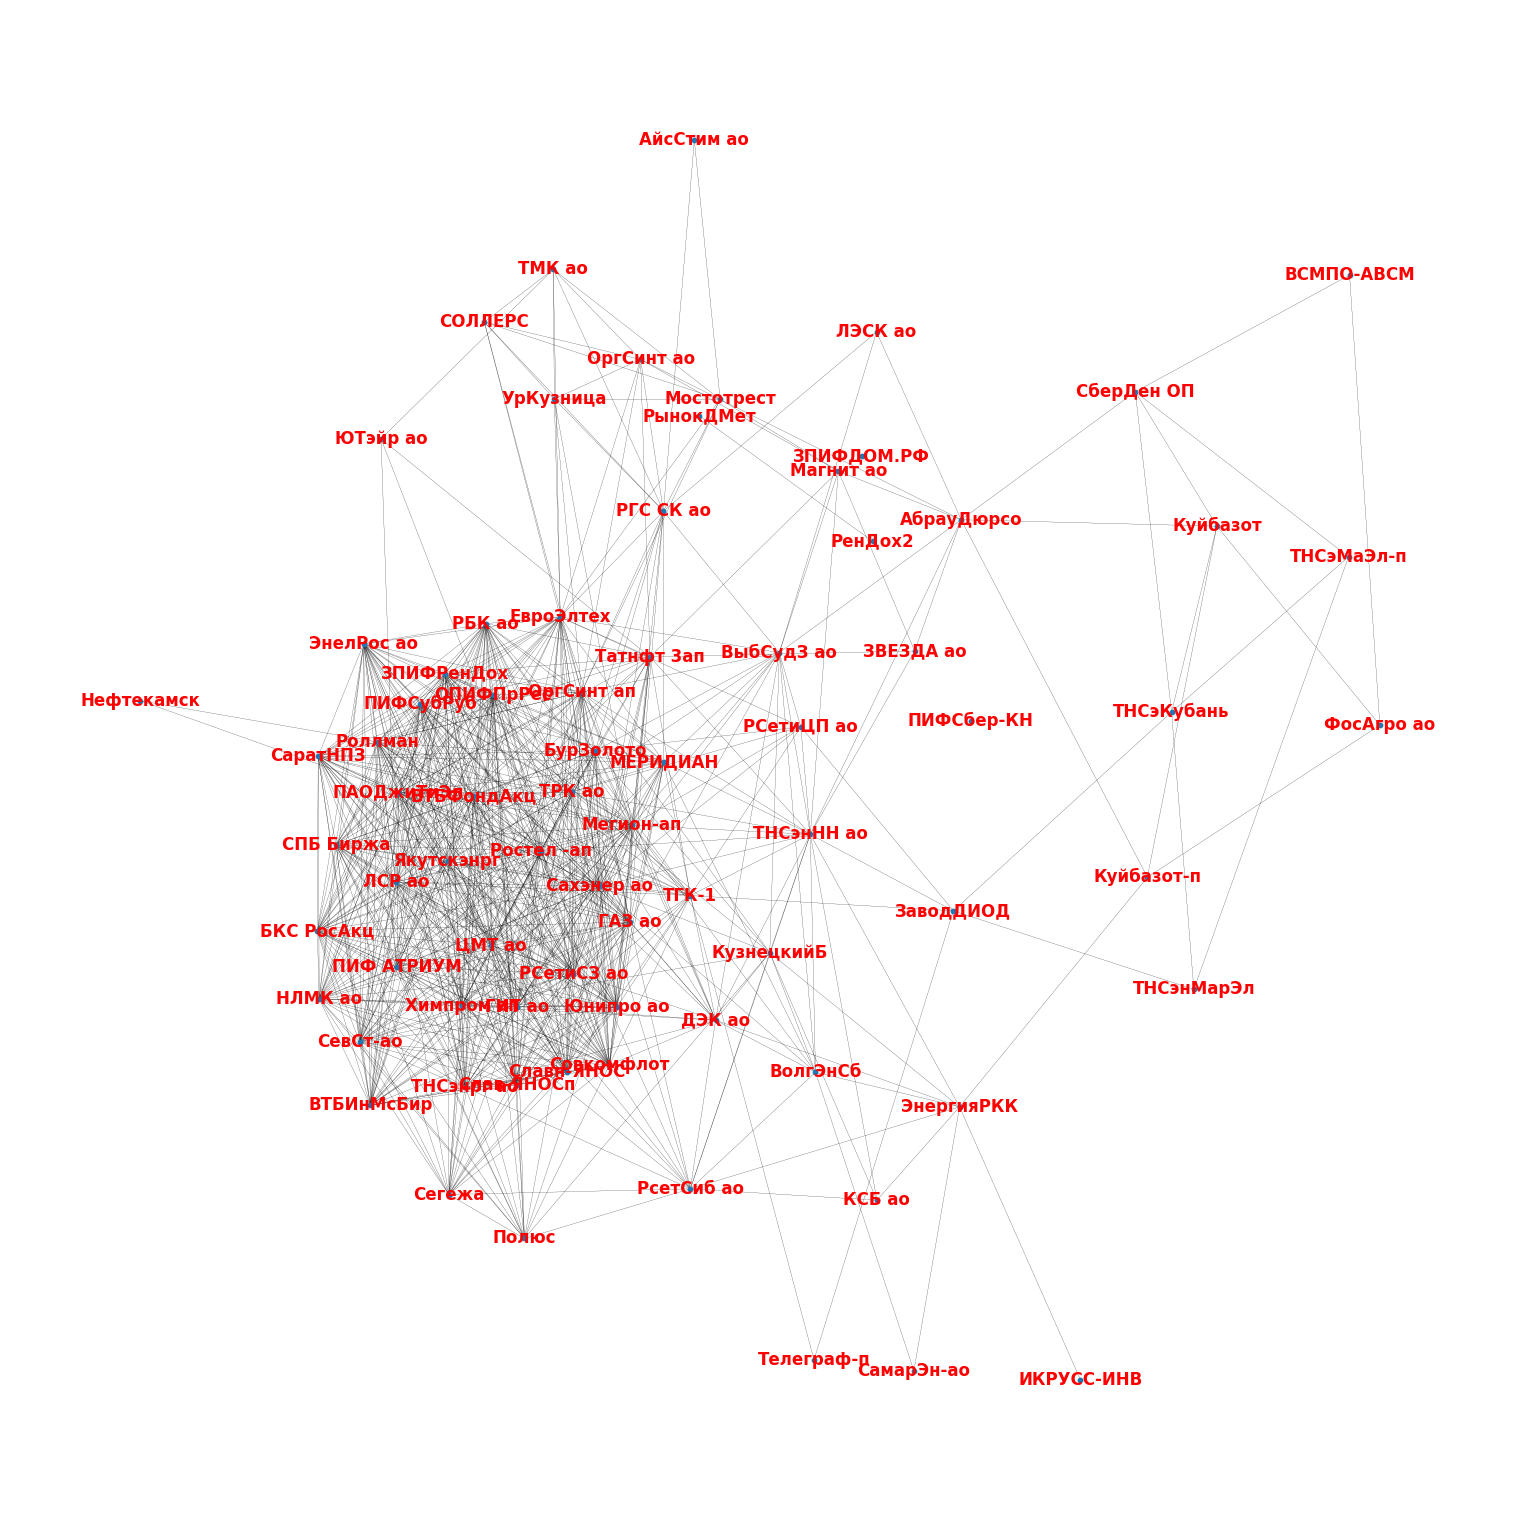

In [221]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(15, 15))
# layout = nx.layout.circular_layout(G)
layout = nx.kamada_kawai_layout(G)

nx.draw(G, with_labels=True, node_size=10, font_size=12, pos=layout, font_color="red", font_weight="bold", width=0.15)
plt.show()

Делаем функцию

Построить рыночный граф акций российских компаний и найти
максимальные клики с указанием компаний (акций), соответствующих
вершинам клики. Заполнить таблицу по расчетным пороговым
значениям коэффициента корреляции.

In [235]:
def correlation_table(thresholds):
    table = pd.DataFrame(columns=['Порог', 'Число акций', 'Перечень акций'])

    for threshold in thresholds:
        G = nx.Graph()

        # добавление вершин (акций)
        tickers = filtered_groups['<TICKER>'].unique()
        for ticker in tickers:
            G.add_node(ticker)

        # добавление ребер (корреляций)
        for i in range(len(tickers)):
            for j in range(i+1, len(tickers)):
                ticker1 = tickers[i]
                ticker2 = tickers[j]
                x = filtered_groups[filtered_groups['<TICKER>']==ticker1]['<CLOSE>']
                y = filtered_groups[filtered_groups['<TICKER>']==ticker2]['<CLOSE>']
                corr, _ = pearsonr(x, y)
                if corr > threshold:
                    G.add_edge(ticker1, ticker2, weight=corr)

        cliques = list(nx.find_cliques(G))
        max_cliques = [c for c in cliques if len(c)==max([len(c) for c in cliques])]

        num_of_tickers = set()
        tickers_list = []
        for clique in max_cliques:
            num_of_tickers.update(clique)
            tickers_list.extend(clique)
        row = [threshold, len(num_of_tickers), list(set(tickers_list))]
        # row = [threshold, len(max_cliques[0]), max_cliques[0]]
        table.loc[len(table)] = row

    return table

thresholds = [0.6, 0.65, 0.7, 0.75, 0.8]
table = correlation_table(thresholds)

table

,Порог,Число акций,Перечень акций
0,0.60,30,"[ПАОДжиТиЭл, ЦМТ ао, РСетиСЗ ао, СаратНПЗ, ОПИ..."
1,0.65,28,"[ПАОДжиТиЭл, ЦМТ ао, РСетиСЗ ао, СаратНПЗ, ОПИ..."
2,0.70,23,"[ПАОДжиТиЭл, ЦМТ ао, РСетиСЗ ао, СаратНПЗ, ОПИ..."
3,0.75,23,"[ПАОДжиТиЭл, ЦМТ ао, РСетиСЗ ао, СаратНПЗ, ОПИ..."
4,0.80,19,"[РСетиСЗ ао, СаратНПЗ, ОПИФПрРес, ГАЗ ао, РБК ..."


In [236]:
table

,Порог,Число акций,Перечень акций
0,0.60,30,"[ПАОДжиТиЭл, ЦМТ ао, РСетиСЗ ао, СаратНПЗ, ОПИ..."
1,0.65,28,"[ПАОДжиТиЭл, ЦМТ ао, РСетиСЗ ао, СаратНПЗ, ОПИ..."
2,0.70,23,"[ПАОДжиТиЭл, ЦМТ ао, РСетиСЗ ао, СаратНПЗ, ОПИ..."
3,0.75,23,"[ПАОДжиТиЭл, ЦМТ ао, РСетиСЗ ао, СаратНПЗ, ОПИ..."
4,0.80,19,"[РСетиСЗ ао, СаратНПЗ, ОПИФПрРес, ГАЗ ао, РБК ..."
